# Final Project: Breast Cancer Random Forest Classification

## 1. Import Library

In [1]:
# Mengimpor Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In [2]:
cancer = pd.read_csv('breast-cancer-datasets.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 3. Data Preprocessing

#### Label Hot Encoding

In [4]:
cancer['status'] = np.where(cancer['diagnosis']=='M', 1, 0)

#### Drop Unnecessary Column

In [5]:
cancer.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1, inplace = True)
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,status
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 4. Data Visualization

#### Displot

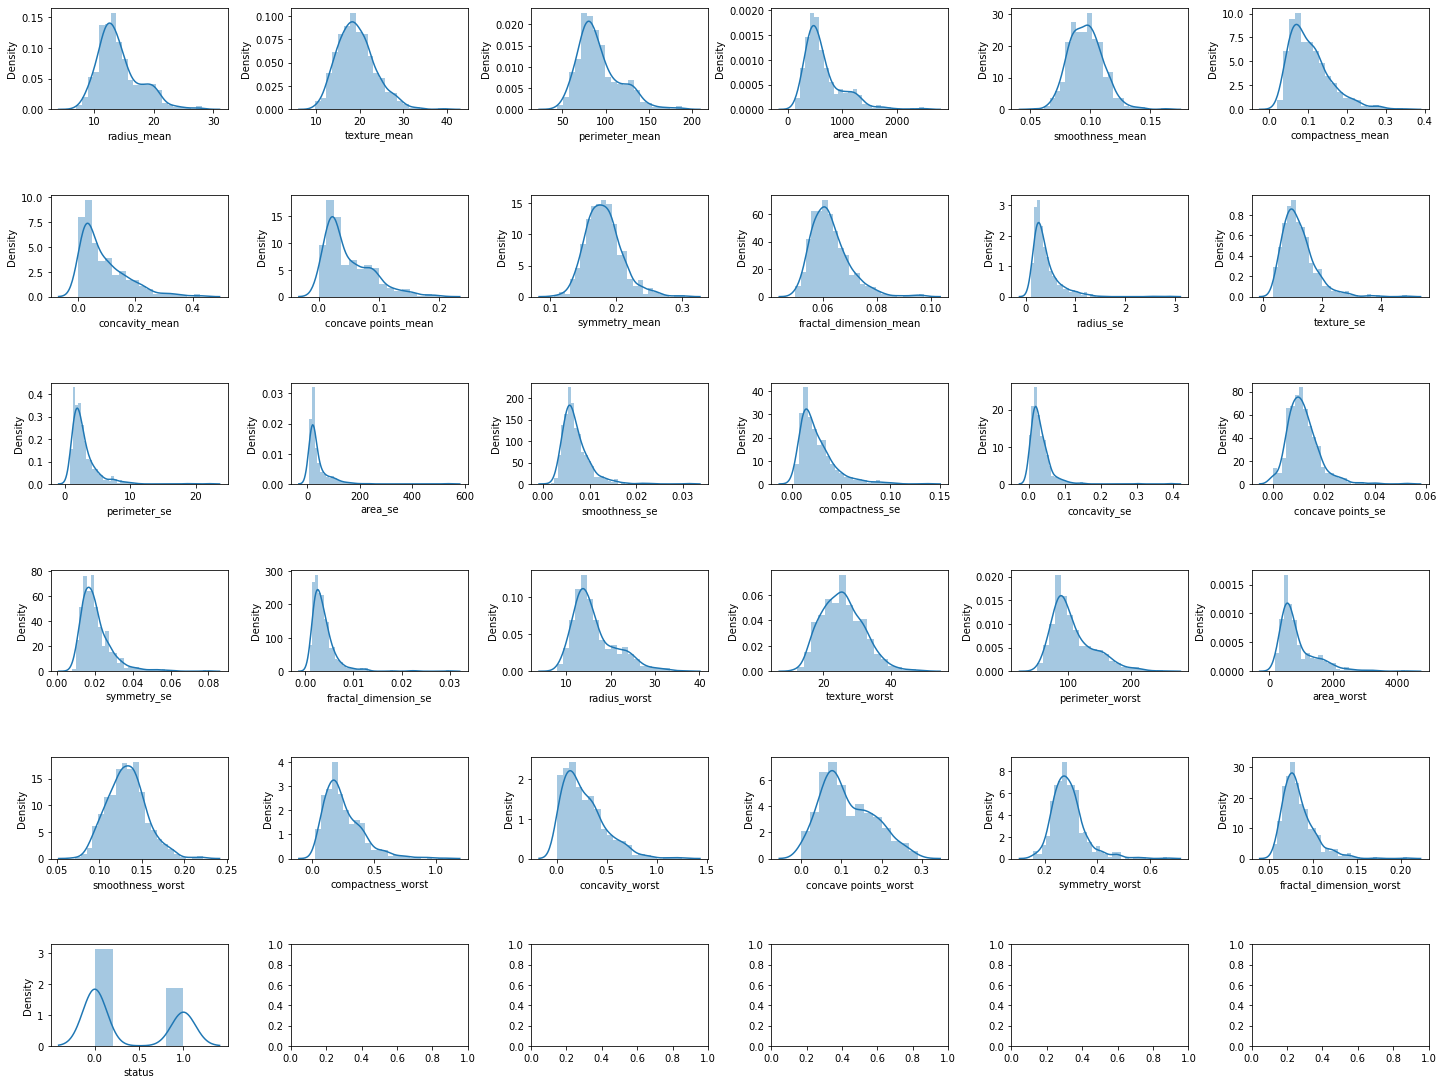

In [6]:
# Define Subplot
fig, ax = plt.subplots(ncols =6, nrows =6, figsize = (20,15))
index = 0
# FLatten ax matriks from nxm to 1xnm
ax = ax.flatten()

# Plot displot for each columns
for col, value in cancer.items():
    sns.distplot(value, ax = ax[index])
    index += 1
# Determine padding between subplots
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

#### Pair Plot

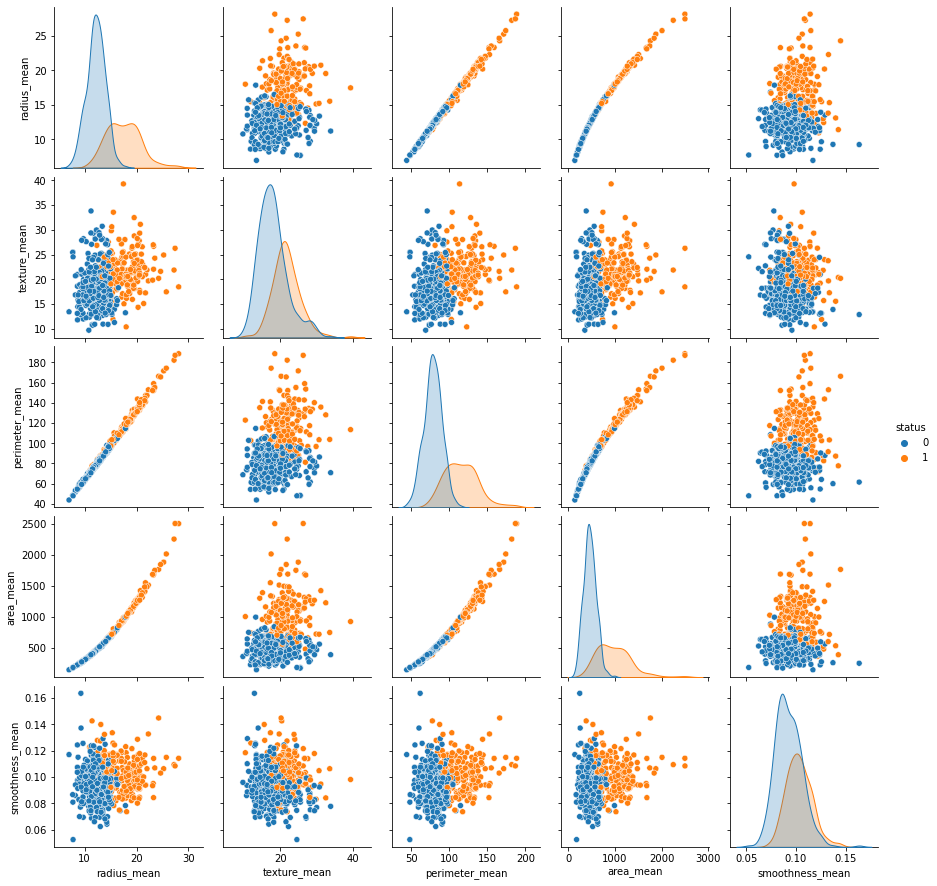

In [7]:
sns.pairplot(cancer, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], hue = 'status' )

#### Heat Map

<AxesSubplot:>

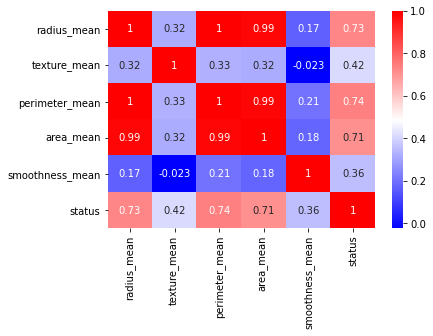

In [8]:
sns.heatmap(cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','status']].corr(), annot=True, cmap='bwr')

## 5. Data Split (Train and Test)

In [9]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

#### Define Label

In [10]:
y = cancer[['status']]
y.head()

,status
0,1
1,1
2,1
3,1
4,1


#### Define Feature

In [11]:
X = cancer.drop(['status'], axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
print('Train data row number:', X_train.shape[0])

Train data row number: 455


In [14]:
print('Test data row number', X_test.shape[0])

Test data row number 114


#### Change Feature Scaling (Standard Scaler)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 6. Run The Model

#### Train Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_clf = RandomForestClassifier(n_estimators = 100)

In [20]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

#### Test Model

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred = rf_clf.predict(X_test)

In [23]:
ac_score = accuracy_score(y_test, y_pred)
print('Model Accuracy is', ac_score)

Model Accuracy is 0.956140350877193


#### Importance Score

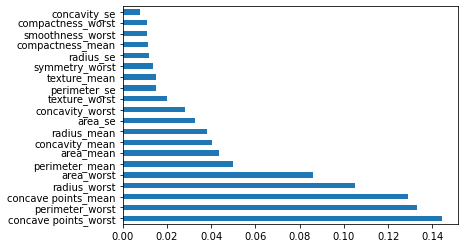

In [24]:
feature_importances = pd.Series(rf_clf.feature_importances_, index = X.columns.values.tolist())
feature_importances.nlargest(20).plot(kind = 'barh')
plt.savefig('feature_importances.png')

#### Visualize Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)

In [27]:
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = np.asarray(["{}\n{}".format(text,data) for text, data in zip(text.flatten(), cm.flatten())]).reshape(2,2)

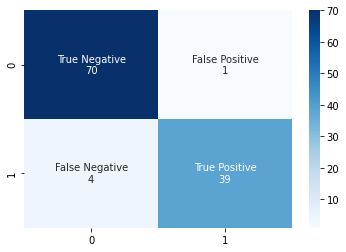

In [28]:
cm_plot = sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt = '')
cm_plot.figure.savefig("confusion_matrix.png")

#### Classification Report

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## 7. Visualize a Decision Tree

#### Extract a Single Tree

In [31]:
# Extract single tree
estimator = rf_clf.estimators_[0]

In [35]:
print('Estimator Accuracy is', estimator.score(X_test, y_test))

Estimator Accuracy is 0.9473684210526315


#### Reset Seaborn and Back to Matplotlib

In [32]:
import matplotlib as mpl
mpl.rc_file_defaults()

#### Plot a Tree

In [33]:
data = pd.read_csv('breast-cancer-datasets.csv')

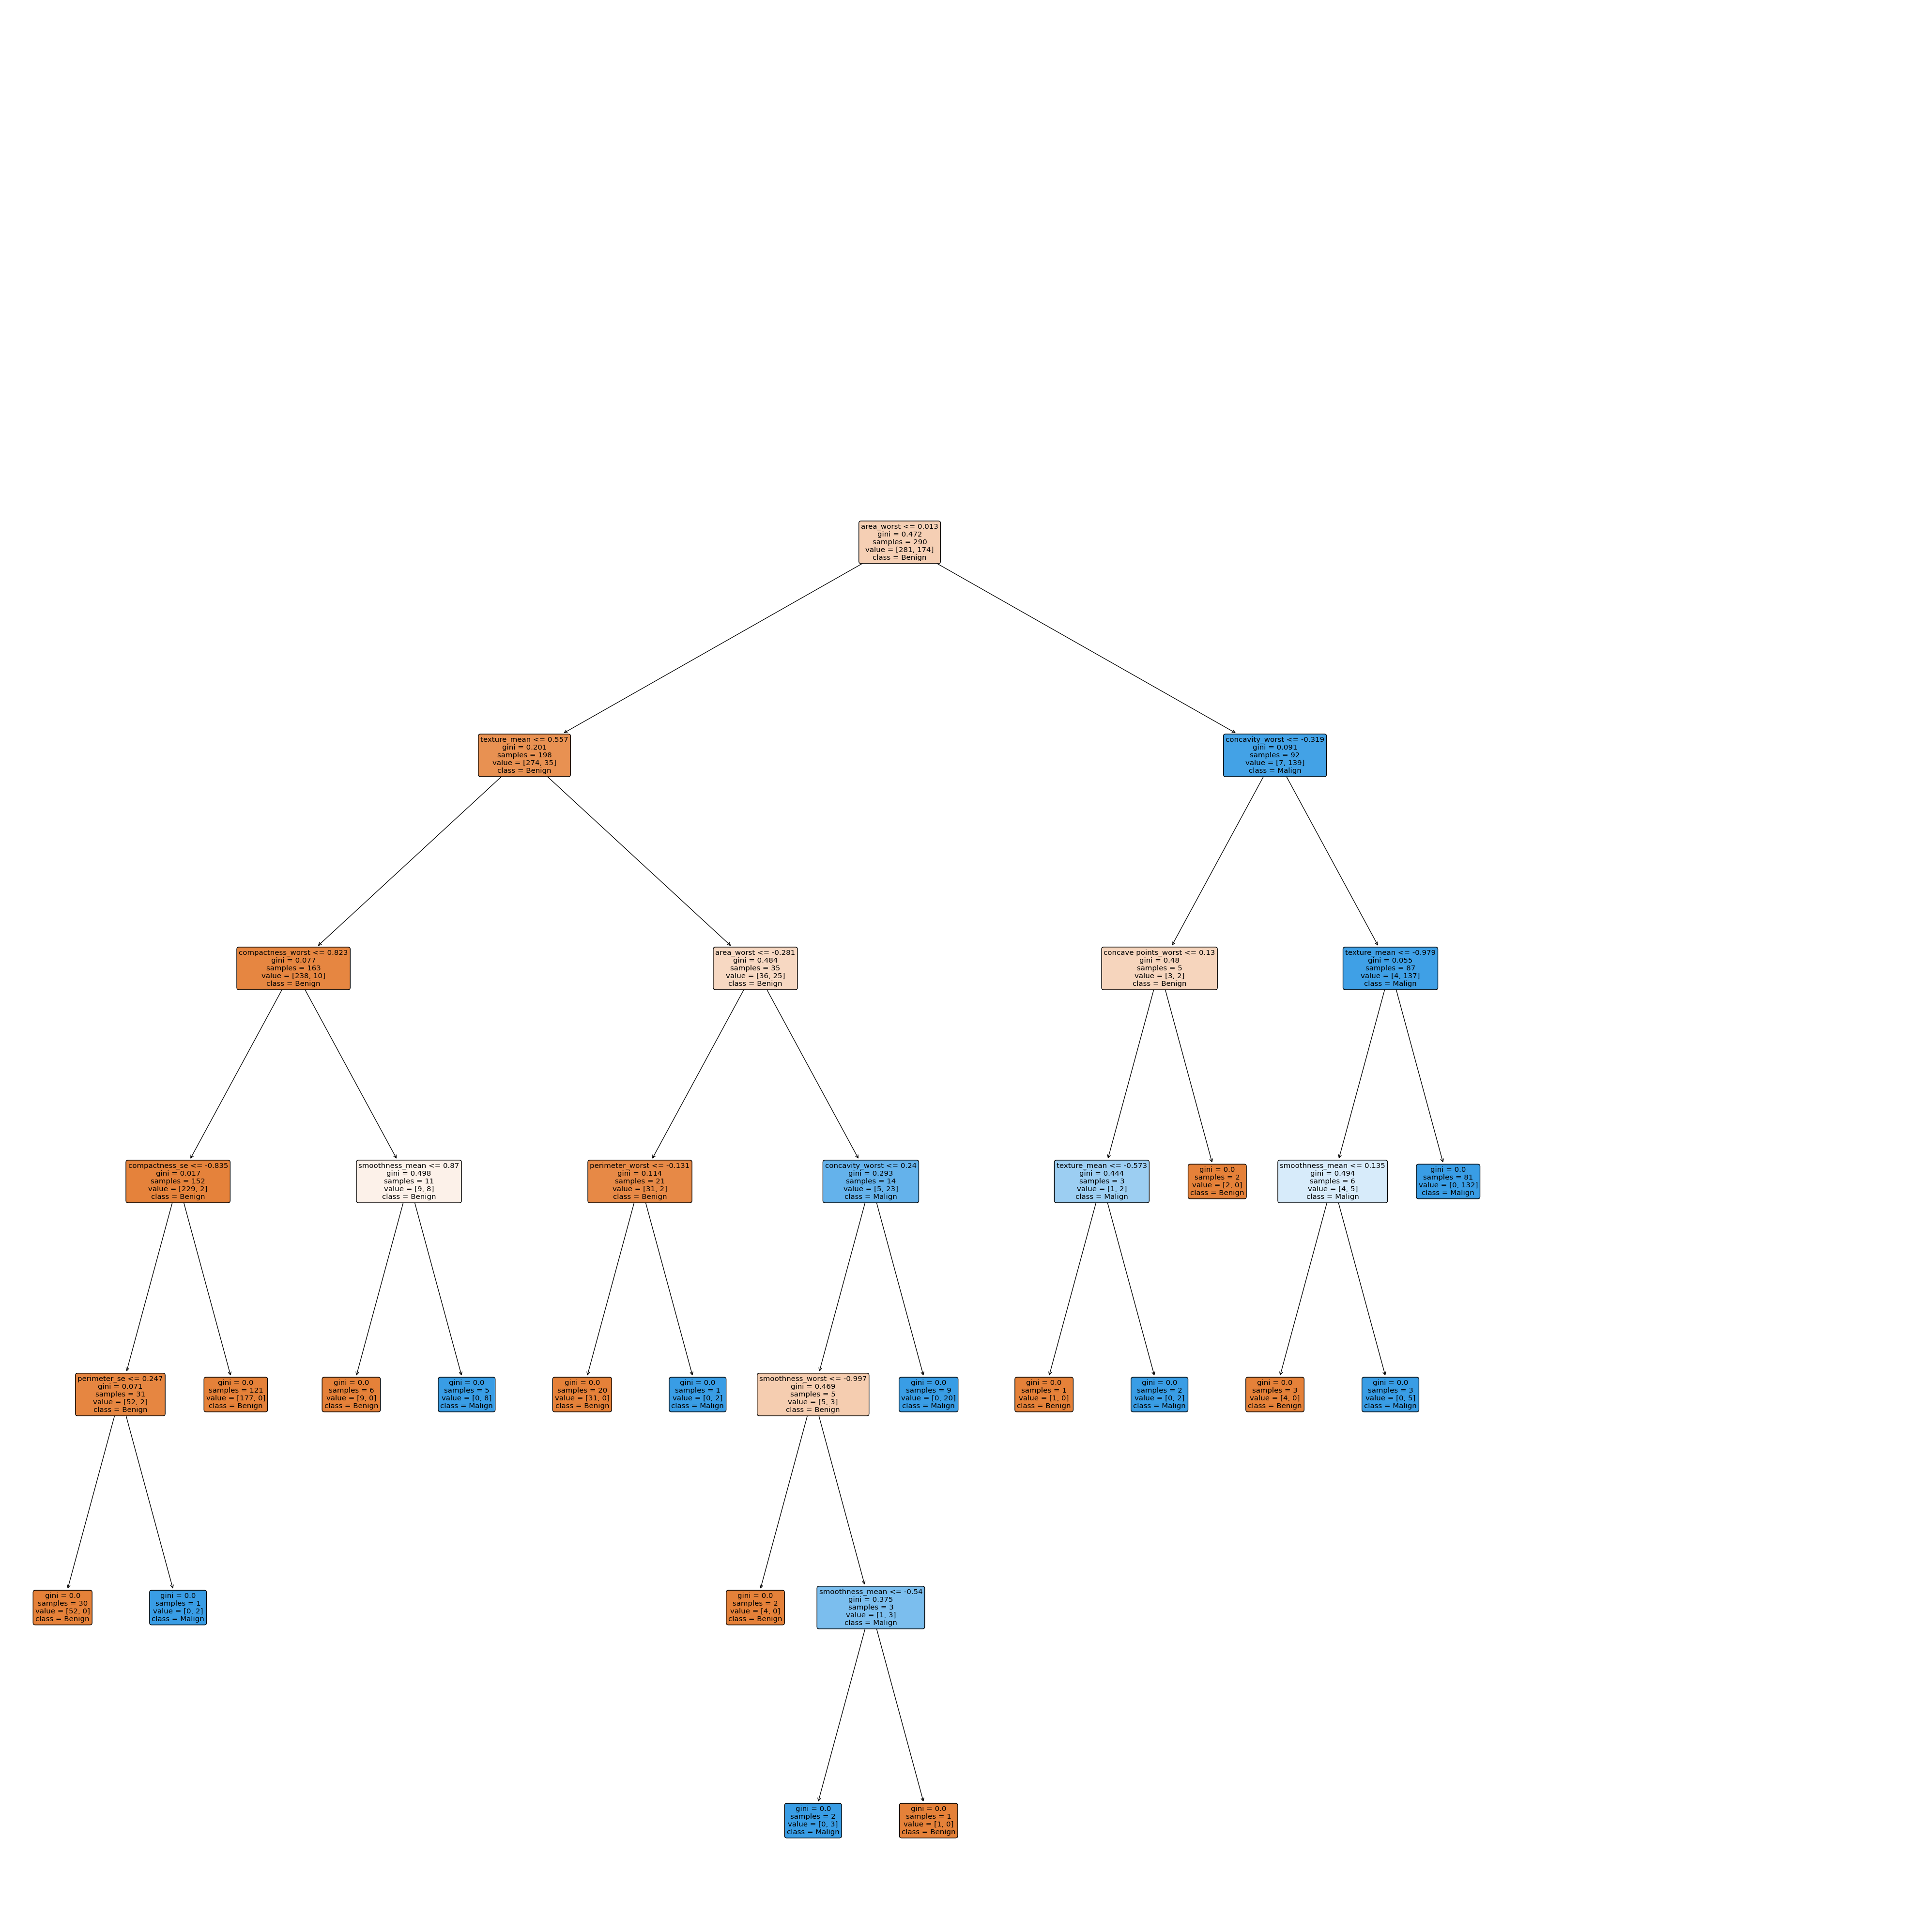

In [34]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(40, 40))
plot_tree(estimator,
          feature_names = X.columns,
          class_names = ['Benign', 'Malign'],
          filled=True, impurity=True, 
          rounded=True)
plt.tight_layout()

#### Save the Figure

In [37]:
fig.savefig('Tree.png')